<a href="https://colab.research.google.com/github/suzy7526/Heart-Failure-Prediction-ML-Model/blob/main/Hands_on_Model_Building_(Heart_Failure_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Workshop at US-Korea Conference
# *Hands-on Model Building (Fetal Health Classification)*
(UKC 2023 Dallas, TX, August 5, 2023, Session 2)

---

## Save a Copy First
Make a copy of this notebook to your own local drive from the menu at top:
* Click "Copy to Drive" button or
* Click "File" -> "Save a copy in Drive"
* Verify new file name at top begins with "Copy of "

To test if you made a copy successfully run the code below by clicking on the code cell and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

If you get a warning that says "**Warning: This notebook was not authored by Google.**" then you did not successfully save a copy. Click Cancel and try again.


In [2]:
print('Hello World')

Hello World


If successfully printed the message, you may close the other tab with the master copy file.  Then please proceed otherwise repeat the instructions above.

---

# Heart Failure Prediction Dataset

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

--------
Follow along this notebook as a guide to do EDA (Exploratory Data Analysis). At the end of the notebook, experiment and build your own ML models to classify the health of a fetus as Normal, Suspect, or Pathological using CTG data.

## Import Packages and Helper Functions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

np.random.seed(0)

## Load Data into Pandas DataFrame

In [4]:
url_file = 'https://raw.githubusercontent.com/gauravjain2/heart-failure-prediction/main/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url_file)

In [5]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
# information about a DataFrame including the index dtype and columns, non-null values and memory usage
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# Generate descriptive statistics
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

Input Features:

- **age** - age of patient
- **anaemia** - Decrease of red blood cells or hemoglobin (boolean)
- **creatinine_phosphokinase** - Level of the CPK enzyme in the blood (mcg/L)
- **diabetes** - If the patient has diabetes (boolean)
- **ejection_fraction** - Percentage of blood leaving the heart at each contraction (percentage)
- **high_blood_pressure** - If the patient has hypertension (boolean)
- **platelets** - Platelets in the blood (kiloplatelets/mL)
- **serum_creatinine** - Level of serum creatinine in the blood (mg/dL)
- **serum_sodium** - Level of serum sodium in the blood (mEq/L)
- **sex** - Woman or man (binary)
- **smoking** - If the patient smokes or not (boolean)
- **time** - Follow-up period (days)


Target Label:

- **DEATH_EVENT** - If the patient deceased during the follow-up period (boolean)

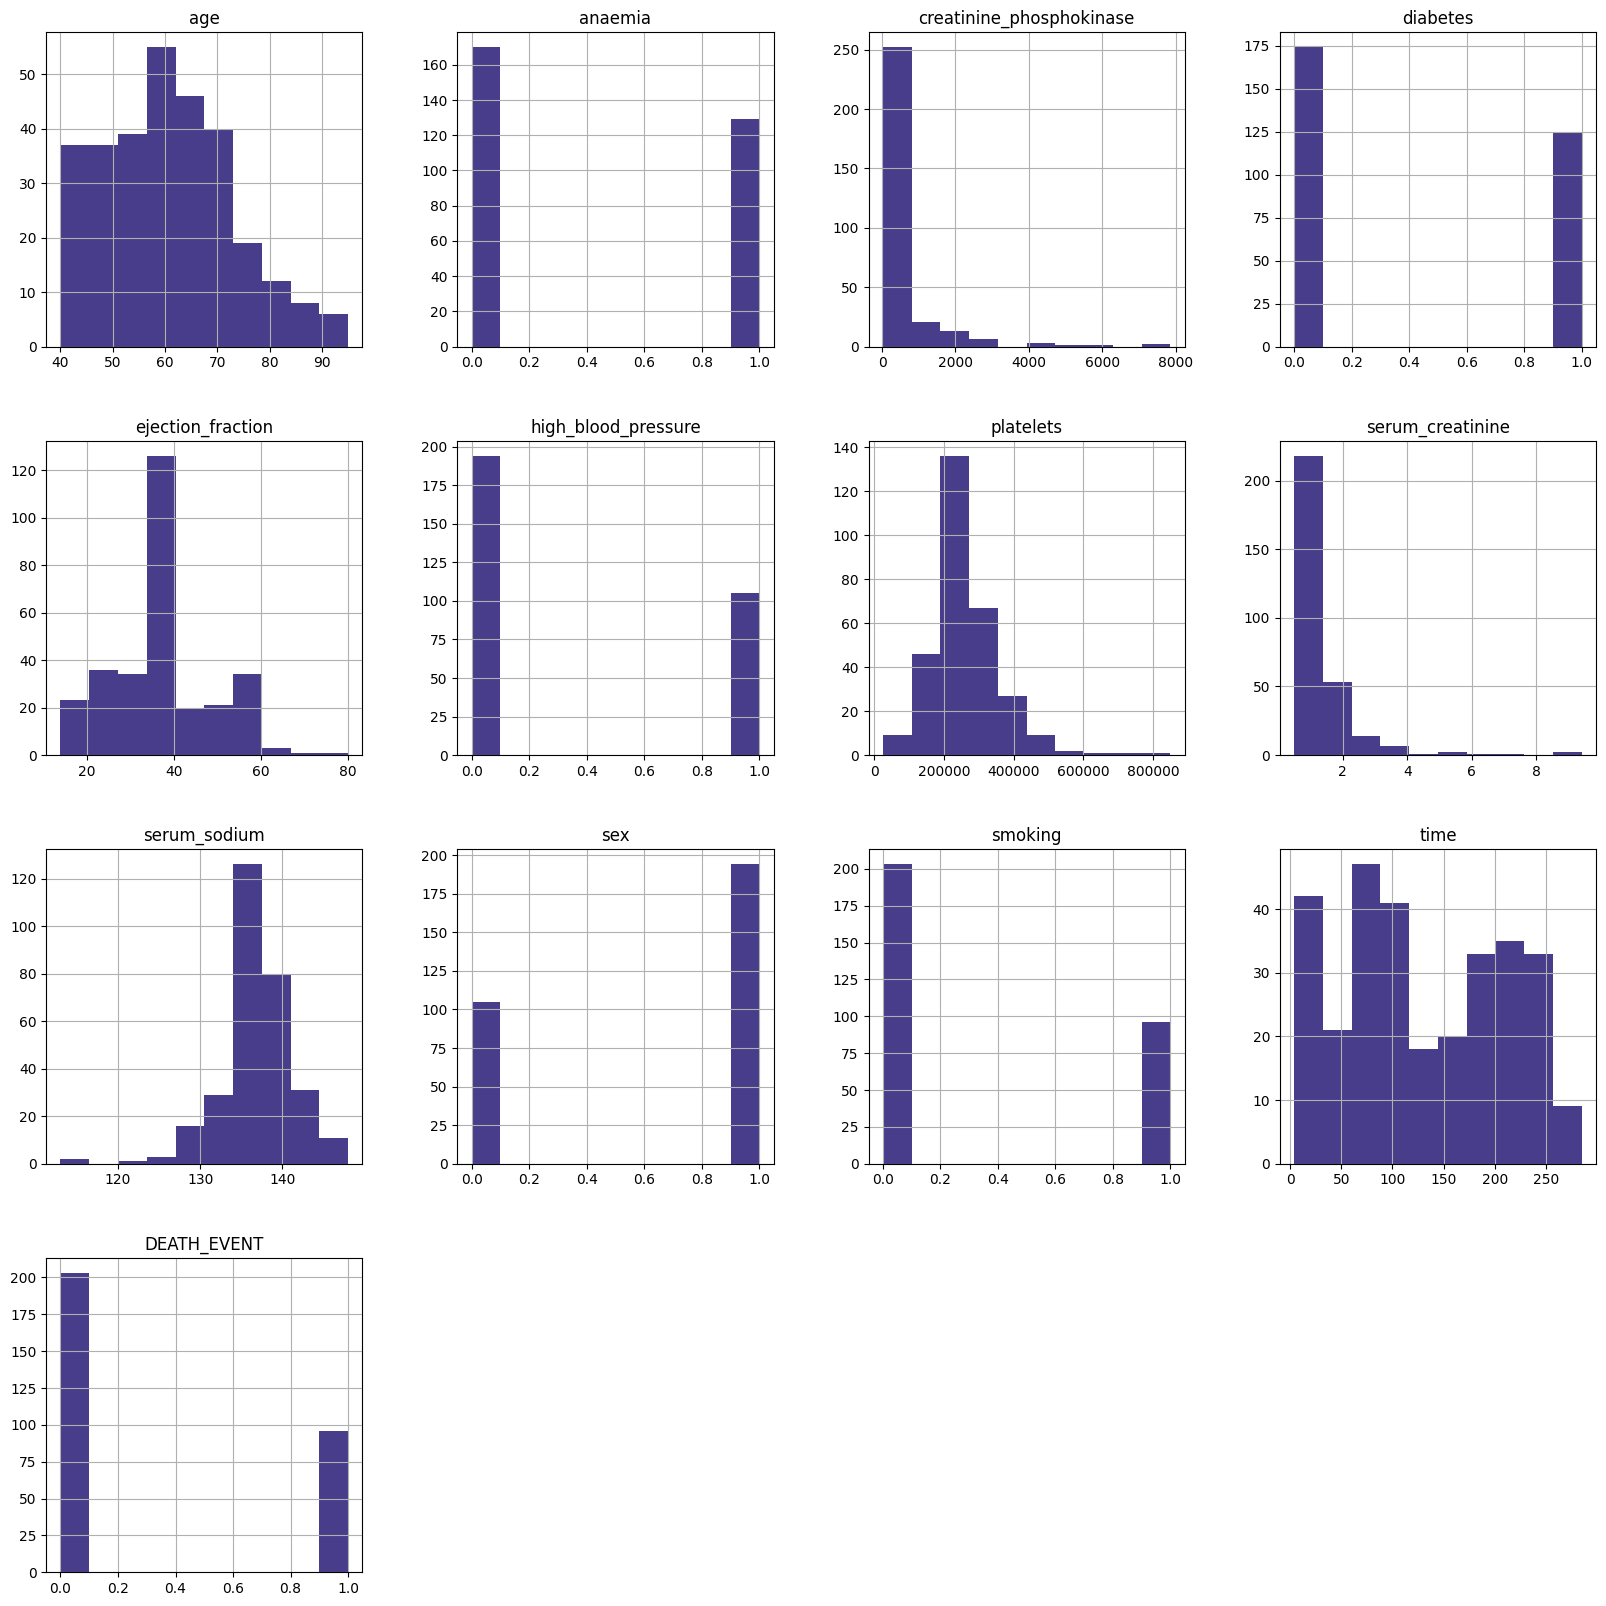

In [8]:
# Evaluating distributions of the features
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
hist_plot = data.hist(figsize = (20,20), color = "#483D8B")

### Team Discussion 1
What can you tell from these histograms of each features?

age & serum_creatininine

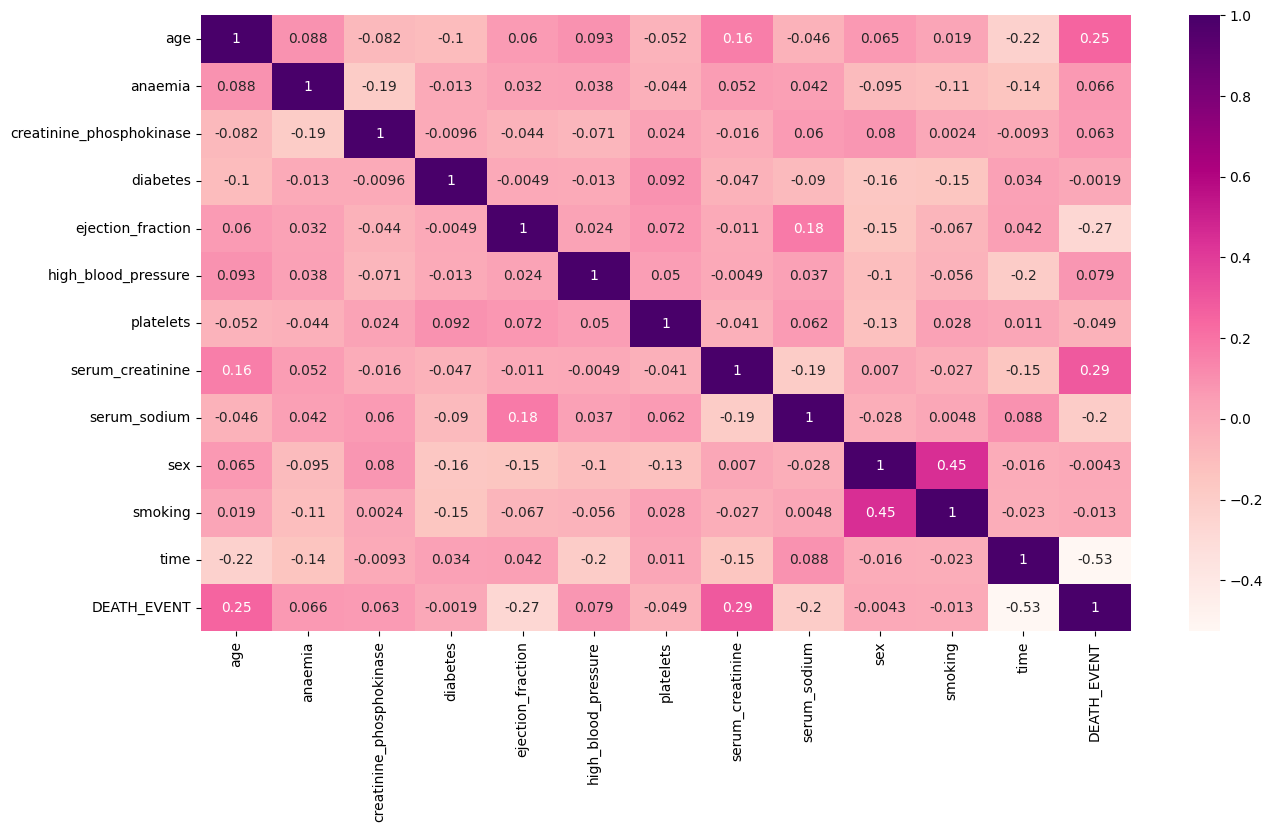

In [9]:
# generate heatmap to display correlations in data using seaborn
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap="RdPu");

### Team Discussion 2
Take a close look at the above heatmap.


- Which features seem to have the highest correlation with *DEATH_EVENT*?
 - Is it positive or negative correlation?

- Which features seem to have the lowest correlation with *DEATH_EVENT*?



Discuss with your team.

Text(0.5, 1.0, 'serum_sodium and Death')

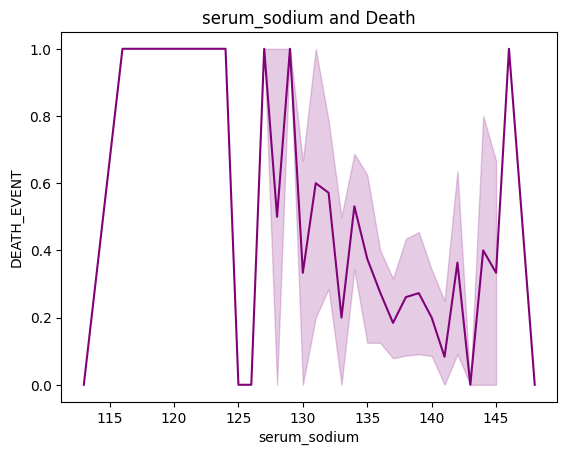

In [10]:
# line plot to visualize correlation between two columns
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

# Replace <Choose a Feature> with a feature name before running this cell
select_feature = 'serum_sodium'
sns.set_palette(palette='RdPu_r')
sns.lineplot(x=select_feature, y='DEATH_EVENT', data=data, alpha=1.0)
plt.title(f'{select_feature} and Death')

Text(0.5, 1.0, 'serum_creatinine and Death')

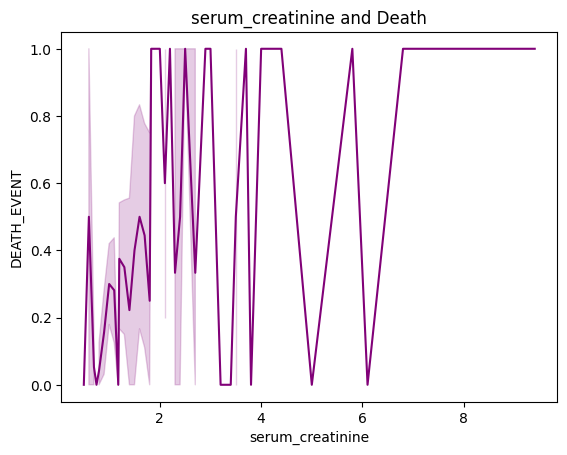

In [11]:
select_feature = 'serum_creatinine'
sns.set_palette(palette='RdPu_r')
sns.lineplot(x=select_feature, y='DEATH_EVENT', data=data, alpha=1.0)
plt.title(f'{select_feature} and Death')

---

## Prepare the Data

### Scale the data
Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one. The most common techniques of feature scaling are Normalization and Standardization. Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless.

In [12]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [13]:
# Based on findings from earlier sections,
# choose the columns you'd like to train your model on!
columns = ['age', 'serum_sodium', 'time', 'sex', 'smoking']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data[columns],), columns = columns)

In [14]:
X.head()

,age,serum_sodium,time,sex,smoking
0,1.192945,-1.504036,-1.629502,0.735688,-0.687682
1,-0.491279,-0.141976,-1.603691,0.735688,-0.687682
2,0.350833,-1.731046,-1.590785,0.735688,1.454161
3,-0.912335,0.085034,-1.590785,0.735688,-0.687682
4,0.350833,-4.682176,-1.577879,-1.359272,-0.687682


In [15]:
# This will be the ground truth label (or target variable)
y = data["DEATH_EVENT"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

### Train/Test Split and Cross-Validation Methods
- Train/Test Split: To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.
- Cross-Validation: Sometimes called rotation estimation or out-of-sample testing, cross-validation is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.

(Taken from https://www.kaggle.com/code/pariaagharabi/step-by-step-fetal-health-prediction-99-detailed)

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Read about stratification -> (https://scikit-learn.org/stable/modules/cross_validation.html#stratification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 5), (90, 5), (209,), (90,))

---

## Build Machine Learning Models
Now that you have the data to train the models on, you can build your own models with your team by following our fill-in-the-blank style guided code. Suggested solution for each of the three models below are also provided at the end.
1. Logistic Regression
2. Random Forest
3. Gradient Boosting

### Logistic Regression (LR)

#### Guided Model Building


In [18]:
# First, build the base model with default parameters:
# Replace the two ?s with train data X and labels y
logistic_regression = LogisticRegression()
logistic_regression_model = logistic_regression.fit( X_train , y_train )

In [19]:
# Calculate the mean accuracy from using our model on the given test data X and labels y
print(f"Baseline Logistic Regression: {round(logistic_regression_model.score(X_test, y_test), 3)}")

Baseline Logistic Regression: 0.822


In [20]:
# Run the model on test data
pred_logistic_regression = logistic_regression_model.predict( X_test )

# See the model
pred_logistic_regression

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1])

In [21]:
# Print the Classification Report by comparing the test label
# and the above model that predicted the labels
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

print("Classification Report")
print(classification_report( y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        61
           1       0.84      0.55      0.67        29

    accuracy                           0.82        90
   macro avg       0.83      0.75      0.77        90
weighted avg       0.83      0.82      0.81        90



In [22]:
# Let's tune hyperparameters by using cross-validation model StratifiedKFold
# Set the n_splits to an integer of 2 or greater
# Set random_state to an integer of 0 or greater
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

cv_method = StratifiedKFold(n_splits= 5 , shuffle=True, random_state= 1 )

In [23]:
# Cross validate Logistic Regression model
# See documentation to determine parameters to replace ?s with
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
scores_Logistic = cross_val_score(
    logistic_regression,
    X =  X_test,
    y = pred_logistic_regression,
    cv = None,
    n_jobs = None ,
    scoring = "accuracy"
    )

In [24]:
print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"Cross Validation Means: {round(scores_Logistic.mean(), 3)}")
print(f"Cross Validation Standard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[1.         1.         0.88888889 0.94444444 0.94444444]
Cross Validation Means: 0.956
Cross Validation Standard Deviation: 0.042


In [25]:
# Find what parameters are currently used by the model
# You can read more about each parameter in sklearn's model documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
# Set parameters for Grid Search
# We have provided some parameters as a placeholder. Feel free to change values!
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
            }

In [27]:
# GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.
# https://www.mygreatlearning.com/blog/gridsearchcv/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

GridSearchCV_LR = GridSearchCV(estimator=LogisticRegression(),
                                param_grid= params_LR , # we defined it in the above cell
                                cv=cv_method , # we defined this method a few cells up
                                verbose=1,
                                n_jobs= 2 , # number of jobs to run in parallel
                                scoring="accuracy",
                                return_train_score=True
                                )

In [28]:
# Fit model with train data and train label
GridSearchCV_LR.fit( X_train, y_train );

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [29]:
# Find the best hyperparameters from the Grid Search results
# Use the resulting parameters in the next cell for the best-scoring predictions
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best estimator for LR model:
LogisticRegression(C=10)
Best parameter values for LR model:
{'C': 10, 'intercept_scaling': 1, 'tol': 0.0001}
Best score for LR model: 0.818


In [30]:
# Replace the values with the best parameters outputted in the previous cell
# If you used other hyperparameters, change accordingly!

logistic_regression = LogisticRegression(
    C= 10 ,
    intercept_scaling= 1,
    tol= 0.0001 ,
    random_state=42
    )

In [31]:
# Let's fit the models again using our train data and train labels
logistic_regression_model = logistic_regression.fit( X_train, y_train)
pred_logistic_regression = logistic_regression_model.predict( X_test)

In [32]:
# Finally, print the scores using your test labels and predictions

print("Classification Report")
print(classification_report( y_test, pred_logistic_regression ))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        61
           1       0.80      0.55      0.65        29

    accuracy                           0.81        90
   macro avg       0.81      0.74      0.76        90
weighted avg       0.81      0.81      0.80        90



### Random Forest (RF)


#### Guided Model Building

In [33]:
# First, build the base model with default parameters:
# Replace the two ?s with train data X and labels y
random_forest = RandomForestClassifier()
random_forest_model = random_forest.fit(X_train, y_train)

In [34]:
print(f"Baseline Random Forest: {round(random_forest_model.score(X_test, y_test), 3)}")

Baseline Random Forest: 0.833


In [35]:
# Run the model on test data
pred_random_forest = random_forest_model.predict(X_test )

# See the model
pred_random_forest

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1])

In [36]:
# Let's tune hyperparameters by using cross-validation model StratifiedKFold
# Set the n_splits to an integer of 2 or greater
# Set random_state to an integer of 0 or greater
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

cv_method = StratifiedKFold(n_splits=3, shuffle=True, random_state=42 )

In [37]:
# Cross validate Logistic Regression model
# See documentation to determine parameters to replace ?s with
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

scores_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.81428571 0.81428571 0.84057971]
CrossValMeans: 0.823
CrossValStandard Deviation: 0.012


In [38]:
# Find what parameters are currently used by the model
# You can read more about each parameter in sklearn's model documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
# Set parameters for Grid Search
# We have provided some parameters as a placeholder. Feel free to change values!

params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]
            }

In [40]:
# GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.
# https://www.mygreatlearning.com/blog/gridsearchcv/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                               param_grid=params_RF,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [41]:
# Fit model with train data and train label
GridSearchCV_RF.fit(X_train, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [42]:
# Find the best hyperparameters from the Grid Search results
# Use the resulting parameters in the next cell for the best-scoring predictions

best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")
best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best estimator for RF model:
RandomForestClassifier(min_samples_leaf=16, min_samples_split=20,
                       n_estimators=200)
Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 16, 'min_samples_split': 20, 'n_estimators': 200}
Best score for RF model: 0.857


In [43]:
# Replace the values with the best parameters outputted in the previous cell
# If you used other hyperparameters, change accordingly!

random_forest = RandomForestClassifier(
criterion="gini", n_estimators=300, min_samples_leaf=4, min_samples_split=20, random_state=42)

In [44]:
# Let's fit the model again using our train data and train labels
random_forest_model = random_forest.fit( X_train, y_train)
pred_random_forest = random_forest_model.predict( X_test )

In [45]:
# Finally, print the scores using your test labels and predictions

print("Classification Report")
print(classification_report( y_test, pred_random_forest ))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        61
           1       0.84      0.55      0.67        29

    accuracy                           0.82        90
   macro avg       0.83      0.75      0.77        90
weighted avg       0.83      0.82      0.81        90



In [46]:
# Baseline model of RF with default parameters:

random_forest = RandomForestClassifier()
random_forest_model = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_model.score(X_test, y_test), 3)}")

pred_random_forest = random_forest_model.predict(X_test)

Baseline Random Forest: 0.833


In [47]:
# Tune the baseline model
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
cv_method = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [48]:
# Cross validate Random forest model
scores_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.81428571 0.81428571 0.84057971]
CrossValMeans: 0.823
CrossValStandard Deviation: 0.012


In [49]:
# Find what parameters are currently used by the model
# You can read more about each parameter in sklearn's model documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]
            }

In [51]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=params_RF,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [52]:
# Fit model with train data
GridSearchCV_RF.fit(X_train, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [53]:
best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier(min_samples_leaf=4, min_samples_split=6)


In [54]:
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}


In [55]:
best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")


Best score for RF model: 0.857


In [56]:
random_forest = RandomForestClassifier(criterion="gini", n_estimators=300, min_samples_leaf=4, min_samples_split=20, random_state=42)
random_forest_model = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_model.predict(X_test)

In [57]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        61
           1       0.84      0.55      0.67        29

    accuracy                           0.82        90
   macro avg       0.83      0.75      0.77        90
weighted avg       0.83      0.82      0.81        90



### Gradient Boosting Classifier (GBC)

#### Guided Model Building

In [58]:
# First, build the base model with default parameters:
# Replace the two ?s with train data X and labels y
gbc = GradientBoostingClassifier()
gbc_model = gbc.fit( X_train, y_train )

In [59]:
print(f"Baseline gradient boosting classifier: {round(gbc_model.score(X_test, y_test), 3)}")

Baseline gradient boosting classifier: 0.789


In [60]:
# Run the model on test data
pred_gbc = gbc_model.predict( X_test)

# See the model
pred_gbc

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0])

In [61]:
# Let's tune hyperparameters by using cross-validation model StratifiedKFold
# Set the n_splits to an integer of 2 or greater
# Set random_state to an integer of 0 or greater
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

cv_method = StratifiedKFold(n_splits= 3 , shuffle=True, random_state= 42 )

In [62]:
# Cross validate Gradient Boosting Classifier model
# See documentation to determine parameters to replace ?s with
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

scores_GBC = cross_val_score(gbc, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")


print(f"Scores(Cross validate) for Gradient Boosting Classifier model:\n{scores_GBC}")
print(f"CrossValMeans: {round(scores_GBC.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_GBC.std(), 3)}")

Scores(Cross validate) for Gradient Boosting Classifier model:
[0.81428571 0.8        0.84057971]
CrossValMeans: 0.818
CrossValStandard Deviation: 0.017


In [63]:
# Find what parameters are currently used by the model
# You can read more about each parameter in sklearn's model documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [64]:
# Set parameters for Grid Search
# We have provided some parameters as a placeholder. Feel free to change values!

params_GBC = {"loss": ["log_loss"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
              "n_estimators": [250, 500],
              "max_depth": [3, 5, 8]
              }

In [65]:
# GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.
# https://www.mygreatlearning.com/blog/gridsearchcv/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(),
                                param_grid= params_GBC ,
                                cv= cv_method ,
                                verbose=1,
                                n_jobs= 2 ,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [66]:
# Fit model with train data and train label
GridSearchCV_GBC.fit(X_train, y_train );

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [67]:
# Find the best hyperparameters from the Grid Search results
# Use the resulting parameters in the next cell for the best-scoring predictions

best_estimator_GBC = GridSearchCV_GBC.best_estimator_
print(f"Best estimator values for GBC model:\n{best_estimator_GBC}")

best_params_GBC = GridSearchCV_GBC.best_params_
print(f"Best parameter values for GBC model:\n{best_params_GBC}")

print(f"Best score value foe GBC model: {round(GridSearchCV_GBC.best_score_, 3)}")

Best estimator values for GBC model:
GradientBoostingClassifier(learning_rate=0.05, n_estimators=250)
Best parameter values for GBC model:
{'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 250}
Best score value foe GBC model: 0.828


In [68]:
# Replace the values with the best parameters outputted in the previous cell
# If you used other hyperparameters, change accordingly!

gbc = GradientBoostingClassifier(
        criterion="friedman_mse",
        learning_rate=0.5,
        loss="log_loss",
        max_depth=5,
        n_estimators=500,
        random_state=42
        )

In [69]:
# Let's fit the model again using our train data and train labels
gbc_model = gbc.fit( X_train, y_train)
pred_gbc = gbc_model.predict( X_test)

In [70]:
# Finally, print the scores using your test labels and predictions
print("Classification Report")
print(classification_report(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        61
           1       0.64      0.62      0.63        29

    accuracy                           0.77        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.76      0.77      0.77        90



## Congratulations!
You have built and tuned three different models to predict classification of Fetal health data. Discuss with your team and prepare a 1-2 page presentation on the given Google Slides file to demonstrate your best model and its performance!

---